In [2]:
import sklearn
from glob import glob
from collections import Counter
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline 
categories = ['ham','spam']
enron_emails =sklearn.datasets.load_files("C:\\Users\\OMKAR\\enrondatacombine",random_state=0)   


In [3]:
#Print the total number of email in enron data-set
print(len(enron_emails.data))

33702


In [4]:
#print total number of Ham emails and total number of Spam emails
ham_emails=sklearn.datasets.load_files('C:\\Users\\OMKAR\\enrondatacombine\\', categories=['ham'])
spam_emails=sklearn.datasets.load_files('C:\\Users\\OMKAR\\enrondatacombine\\', categories=['spam'])
print(len(ham_emails.data))
print(len(spam_emails.data))


16545
17157


In [5]:
xemail=enron_emails.data
yemail=enron_emails.target

In [6]:
# Creating DataFrame from list
import pandas as pd
df_X = pd.DataFrame({'Email':xemail})
df_Y = pd.DataFrame({'Target':yemail})

In [7]:
df_X.head()

,Email
0,b'Subject: re : credit article\r\ndear vince\r...
1,b'Subject: information for homeowners :\r\nhom...
2,"b""Subject: agenda for larry thorne ' s present..."
3,"b""Subject: dear friend\r\ndear friend .\r\nas ..."
4,"b""Subject: re : missing service rates for ena ..."


In [8]:
df_Y.head(10)

,Target
0,0
1,1
2,0
3,1
4,0
5,1
6,1
7,0
8,0
9,1


In [9]:
#EDA on training data set, therefore splitting the preprocessed data for analysis
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.3,random_state=42)
print ("Length of train set:",X_train.shape,y_train.shape)
print ("Length of test set:",X_test.shape,y_test.shape)

Length of train set: (23591, 1) (23591, 1)
Length of test set: (10111, 1) (10111, 1)


In [22]:
df_train = pd.concat([X_train,y_train], axis=1)
df_train.head(10)

,Email,words,Target
16954,"b""subject: get it on with a married babe\r\nho...",b subject get it on with a married up with a l...,1
31682,b'subject: secure your pc online\r\ngood day\r...,secure your pc are now embarking on a massive ...,1
33431,"b""subject: weekend gas\r\njust wanted to revie...",b subject weekend wanted to review weekend sal...,0
31544,"b""subject: hot summer deals on computers , lap...",b subject hot summer deals on computers laptop...,1
12037,"b""subject: the first patented and natura [ l ]...",b subject the first patented and natura l fat ...,1
11686,"b""subject: re [ 4 ] : even you can afford a ro...",b subject re even you can afford a rolex now c...,1
6777,b'subject: looking for cheap high - quality so...,looking for cheap high quality for not expensi...,1
8807,b'subject: failure notice\r\nhi . this is the ...,failure this is the qmail send program at baco...,1
27912,"b""subject: april 30 operational risk meeting\r...",b subject april operational risk sally and i a...,0
21707,"b""subject: wall street phenomenon reaps reward...",b subject wall street phenomenon reaps data in...,1


In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OMKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OMKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
#TokeniZation #removal of special characters and get plain text
import nltk

X_train['Email'] = X_train['Email'].str.lower()

def identify_tokens(row):
    email = str(row['Email']).strip()
    tokens = nltk.word_tokenize(email)
    # taken only words (not punctuation)
    token_words = " ".join([w for w in tokens if w.isalpha()])
    return token_words

X_train['words'] = X_train.apply(identify_tokens, axis=1)
X_train.head()

C:\Users\OMKAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\OMKAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Email,words
16954,"b""subject: get it on with a married babe\r\nho...",b subject get it on with a married up with a l...
31682,b'subject: secure your pc online\r\ngood day\r...,secure your pc are now embarking on a massive ...
33431,"b""subject: weekend gas\r\njust wanted to revie...",b subject weekend wanted to review weekend sal...
31544,"b""subject: hot summer deals on computers , lap...",b subject hot summer deals on computers laptop...
12037,"b""subject: the first patented and natura [ l ]...",b subject the first patented and natura l fat ...


In [25]:
import nltk

df_train['Email'] = df_train['Email'].str.lower()

def identify_tokens(row):
    email = str(row['Email']).strip()
    tokens = nltk.word_tokenize(email)
    # taken only words (not punctuation)
    token_words = " ".join([w for w in tokens if w.isalpha()])
    return token_words

df_train['words'] = df_train.apply(identify_tokens, axis=1)
df_train.head()

,Email,words,Target
16954,"b""subject: get it on with a married babe\r\nho...",b subject get it on with a married up with a l...,1
31682,b'subject: secure your pc online\r\ngood day\r...,secure your pc are now embarking on a massive ...,1
33431,"b""subject: weekend gas\r\njust wanted to revie...",b subject weekend wanted to review weekend sal...,0
31544,"b""subject: hot summer deals on computers , lap...",b subject hot summer deals on computers laptop...,1
12037,"b""subject: the first patented and natura [ l ]...",b subject the first patented and natura l fat ...,1


In [27]:
# Remove Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_train['words'] = df_train['words'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [28]:
# Lemmatizatio
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()

df_train['words'] = df_train['words'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [29]:
#Get frequency of words after lemmatization
freq = pd.Series(' '.join(df_train['words']).split()).value_counts()[:10]
freq

enron      35213
ect        20154
company    17860
hou        11738
com        11450
b          10467
u          10296
e          10074
would       9895
subject     9572
dtype: int64

In [30]:
# Removal of most commonly used words
freq = list(freq)
df_train['words'] = df_train['words'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
w for w in my_list if not w in stops
df_train['words'].head()

16954    b subject get married lonely desperate wife ne...
31682    secure pc embarking massive advertising campai...
33431    b subject weekend wanted review weekend sale s...
31544    b subject hot summer deal computer laptop deli...
12037    b subject first patented natura l fat burner f...
Name: words, dtype: object

In [32]:
df_ham = df_train[df_train.Target==0]
df_ham.head()

,Email,words,Target
33431,"b""subject: weekend gas\r\njust wanted to revie...",b subject weekend wanted review weekend sale s...,0
27912,"b""subject: april 30 operational risk meeting\r...",b subject april operational risk sally plannin...,0
16188,b'subject: channel a / s line maintenance\r\nf...,channel line reduction total capacity station ...,0
32127,b'subject: jones graduate school course descri...,jones graduate school course description list ...,0
17663,"b'subject: hpl nom for sept . 20 , 2000\r\n( s...",hpl nom sept see attached file hplo xl hplo xl,0


In [81]:
#Get frequency of top 20 ham words after lemmatization
#value count returs the value counts of each unique value in the given Series object.
freq_ham = pd.Series(' '.join(df_ham['words']).split()).value_counts()[:20]
freq_ham

enron      35210
ect        20019
hou        11608
company     9360
would       8087
said        7609
energy      6217
new         5862
com         5844
gas         5783
please      5557
time        5470
deal        5407
market      5240
year        4978
corp        4930
power       4910
know        4726
b           4668
u           4619
dtype: int64

In [153]:
#freq_ham.index
import numpy as np
h2=np.array(freq_ham.index)
h1=np.array(freq_ham.value_counts()[:20].index)
print(h1)
print(h2)

[ 5407  5470  5862  5240  6217 35210  4619  4910  9360  4978 20019  5844
  5557  4726  8087 11608  7609  4930  4668  5783]
['enron' 'ect' 'hou' 'company' 'would' 'said' 'energy' 'new' 'com' 'gas'
 'please' 'time' 'deal' 'market' 'year' 'corp' 'power' 'know' 'b' 'u']


In [131]:
#h1=['enron', 'ect', 'hou', 'company', 'would', 'said', 'energy', 'new','com', 'gas', 'please', 'time', 'deal', 'market', 'year', 'corp','power', 'know', 'b', 'u']

#h2=[20019,11608,9360,8087,7609,6217,5862,5844,5783,5557,5470,5407,5240,4978,4930,4910,4726,4668,4619]

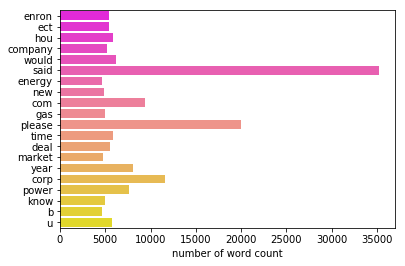

In [163]:
#Plot of the top 20 words most freuently used in ham than spam
import matplotlib.pyplot as plt
import seaborn as sns
bar_plot = sns.barplot(x=h1,y=h2,palette=("spring"),order=h2[:20])
bar_plot.set_xlabel('number of word count')
plt.show()

In [34]:
#top 20 words in SPAM
df_spam = df_train[df_train.Target==1]
df_spam.head()

,Email,words,Target
16954,"b""subject: get it on with a married babe\r\nho...",b subject get married lonely desperate wife ne...,1
31682,b'subject: secure your pc online\r\ngood day\r...,secure pc embarking massive advertising campai...,1
31544,"b""subject: hot summer deals on computers , lap...",b subject hot summer deal computer laptop deli...,1
12037,"b""subject: the first patented and natura [ l ]...",b subject first patented natura l fat burner f...,1
11686,"b""subject: re [ 4 ] : even you can afford a ro...",b subject even afford rolex come expressing in...,1


In [37]:
#Get frequency of top 20 words in spam 
freq_spam = pd.Series(' '.join(df_spam['words']).split()).value_counts()[:20]
freq_spam

company        8500
e              6128
b              5799
u              5677
com            5606
subject        5149
price          4413
statement      4287
email          4169
may            4059
information    4004
one            3953
security       3808
time           3663
business       3566
de             3549
money          3481
http           3455
get            3398
www            3330
dtype: int64

In [157]:
h4=np.array(freq_spam.index)
h3=np.array(freq_spam.value_counts()[:20].index)
print(h3)
print(h4)

[4287 5149 3330 3549 4004 5606 5799 4169 4413 5677 3566 3663 6128 3953
 8500 3455 3398 3481 4059 3808]
['company' 'e' 'b' 'u' 'com' 'subject' 'price' 'statement' 'email' 'may'
 'information' 'one' 'security' 'time' 'business' 'de' 'money' 'http'
 'get' 'www']


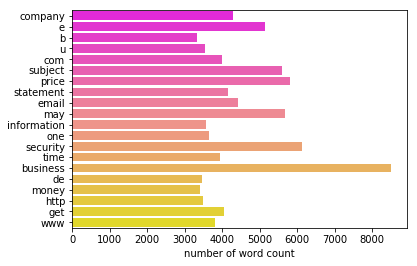

In [164]:
bar_plot1 = sns.barplot(x=h3,y=h4,palette=("spring"),order=h4[:20])
bar_plot1.set_xlabel('number of word count')
plt.show()

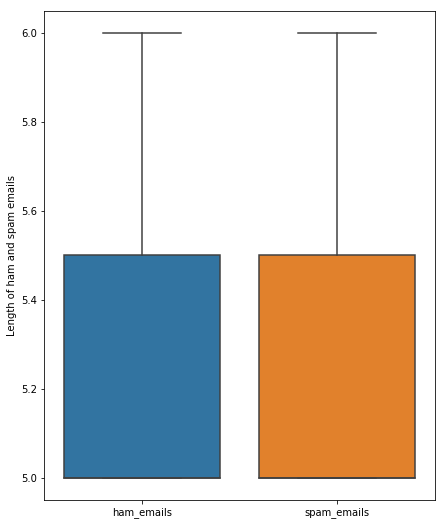

In [167]:
lg_df_ham = []
lg_df_spam = []

for email in df_ham:
    lg_df_ham.append(len(email))

for email in df_spam:
    lg_df_spam.append(len(email))
fig=plt.figure(figsize=(7,9));
plt_email=sns.boxplot(data=[lg_df_ham,lg_df_spam])
plt_email.set(xticklabels=["ham_emails","spam_emails"])
plt_email.set_ylabel('Length of ham and spam emails')
plt.show()

In [89]:
#Suoervised Classification and Feature extraction on Enron data
#TokeniZation #removal of special characters and get plain text
import nltk

df_X['Email'] = df_X['Email'].str.lower()

def identify_tokens(row):
    email = str(row['Email']).strip()
    tokens = nltk.word_tokenize(email)
    # taken only words (not punctuation)
    token_words = " ".join([w for w in tokens if w.isalpha()])
    return token_words

df_X['words'] = df_X.apply(identify_tokens, axis=1)
df_X.head()

,Email,words
0,b'subject: re : credit article\r\ndear vince\r...,re credit you very much for the information wi...
1,b'subject: information for homeowners :\r\nhom...,information for homeowners my last email on i ...
2,"b""subject: agenda for larry thorne ' s present...",b subject agenda for larry thorne s presentati...
3,"b""subject: dear friend\r\ndear friend .\r\nas ...",b subject dear friend you read this i don t wa...
4,"b""subject: re : missing service rates for ena ...",b subject re missing service rates for ena hpl...


In [90]:
#Getting the most repeated words for stopword removal
freq = pd.Series(' '.join(df_X['words']).split()).value_counts()[:10]
freq

the    255344
to     185759
and    141949
of     138541
a      107707
in      96293
for     75932
you     73232
is      67092
on      55127
dtype: int64

In [91]:
# Remove Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_X['words'] = df_X['words'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [92]:
# Lemmatizatio
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()

df_X['words'] = df_X['words'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [93]:
#Get frequency of words after lemmatization
freq = pd.Series(' '.join(df_X['words']).split()).value_counts()[:10]
freq

enron      50192
ect        29314
company    25594
hou        17108
com        16754
b          15041
u          14823
e          14485
would      14213
subject    13700
dtype: int64

In [94]:
# Removal of most commonly used words
freq = list(freq)
df_X['words'] = df_X['words'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_X['words'].head()

0    credit much information get touch today keep i...
1    information homeowner last email mentioned rat...
2    b subject agenda larry thorne presentation mee...
3    b subject dear friend read want feel sorry die...
4    b subject missing service rate ena hplc cash f...
Name: words, dtype: object

In [95]:
#Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_X['words'])
tfidf_matrix.shape

(33702, 115344)

In [96]:
df_X.shape

(33702, 2)

In [97]:
df_X.head()

,Email,words
0,b'subject: re : credit article\r\ndear vince\r...,credit much information get touch today keep i...
1,b'subject: information for homeowners :\r\nhom...,information homeowner last email mentioned rat...
2,"b""subject: agenda for larry thorne ' s present...",b subject agenda larry thorne presentation mee...
3,"b""subject: dear friend\r\ndear friend .\r\nas ...",b subject dear friend read want feel sorry die...
4,"b""subject: re : missing service rates for ena ...",b subject missing service rate ena hplc cash f...


In [98]:
df_X['words'][0]

'credit much information get touch today keep informed j katja schilling lon ect ect vasant shanbhogue hou ect vince j kaminski hou ect credit magazine copyright contact get use external user contact n swly mail risk co riskpublications discus legal aspect katja schilling lon ect vince j kaminski hou ect credit think minor change would allow use file check risk risk book specialist division publication london address haymarket house haymarket swly rx publication book entitled credit derivative application management investment portfolio optimisation publishd sure lawyer involved maybe vince know vasant shanbhogue hou ect bijoya banerjea lon ect credit vasant updated discussion risk magazine credit found attachment sent actually word published version change minor wever altered article way question concern copyright since version sent different think give u freedom publish consent risk tell published risk uk risk issue want detail call someone magazine lawyer involved publication proced

In [99]:
# top keywords were in those emails
import numpy as np
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

features = tf.get_feature_names()
print(top_feats_in_doc(tfidf_matrix, features, 1, 10))

    features     score
0       rate  0.425991
1  ratelower  0.374244
2      edged  0.302038
3     partid  0.268178
4    lending  0.249408
5  homeowner  0.241167
6   slightly  0.234971
7     rising  0.230132
8     lender  0.218100
9     lowest  0.195071


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix,df_Y,test_size=0.3,random_state=42)
print ("Length of train set:",X_train.shape,y_train.shape)
print ("Length of test set:",X_test.shape,y_test.shape)

Length of train set: (23591, 115344) (23591, 1)
Length of test set: (10111, 115344) (10111, 1)


In [101]:
#creating validation data from training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
print ("Length of train set:",X_train.shape,y_train.shape)
print ("Length of validation set:",X_val.shape,y_test.shape)
    

Length of train set: (16513, 115344) (16513, 1)
Length of validation set: (7078, 115344) (10111, 1)


In [102]:
#Using pickle operation to serialize machine learning algorithms and save the serialized format to a file.
import pickle
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB(alpha=0.01)
multi_nb.fit(X_train,y_train)
with open('trainModel.pickle','wb') as modelFile:
    pickle.dump(multi_nb,modelFile)

C:\Users\OMKAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
y_pred = multi_nb.predict(X_val)

In [104]:
# Evaluating the Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[3393   45]
 [  85 3555]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      3438
          1       0.99      0.98      0.98      3640

avg / total       0.98      0.98      0.98      7078

0.9816332297259113


In [105]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state =42)
# Train the model on training data
rf.fit(X_train, y_train);

C:\Users\OMKAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [106]:
# Use the forest's predict method on the test data
y_predictions = rf.predict(X_val)
rf_accuracy=metrics.accuracy_score(y_val,y_predictions)
rf_accuracy

0.9810680983328623

In [107]:
#Implementation of model DecisionTree
from sklearn.tree import DecisionTreeClassifier
d_tree_c=DecisionTreeClassifier(splitter='random',random_state=0)
d_tree_c.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='random')

In [108]:
y_pred_d_tree_c = d_tree_c.predict(X_val)
d_tree_cAcc=metrics.accuracy_score(y_val, y_pred_d_tree_c)
d_tree_cAcc

0.9441932749364227

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\OMKAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
y_pred_lgr = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set')
logreg_accuracy=metrics.accuracy_score(y_val,y_pred_lgr)
logreg_accuracy

Accuracy of logistic regression classifier on test set


0.9759819157954225

Text(0.5,1,'Accuracy Scores')

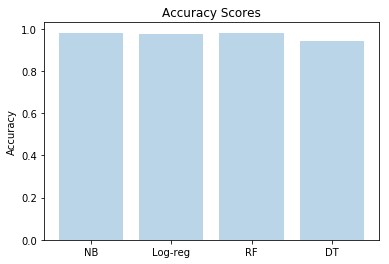

In [111]:
#accuracy score comparison
from matplotlib import pyplot as plt
O= ['NB', 'Log-reg', 'RF', 'DT']
Accuracy= [0.9816332297259113,0.9759819157954225,0.9810680983328623, 0.9441932749364227]
position= np.arange(len(O))
plt.bar(position, Accuracy, align ='center', alpha=0.3)
plt.xticks(position,O)
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

In [112]:
#Calculate Perdicted Probabilities fot validation emails
y_predict_pb = multi_nb.predict_proba(X_val)[:, 1]
y_predict_pb

array([3.46847657e-04, 1.00829358e-01, 9.99650412e-01, ...,
       9.24228238e-04, 9.99999988e-01, 9.99993180e-01])

In [113]:
#Acuuracy of models in list format
Model_select = pd.DataFrame({'Accuracy':Accuracy, 'Models':O}).set_index('Models')
Model_select.sort_values('Accuracy', ascending=True)

,Accuracy
Models,
DT,0.944193
Log-reg,0.975982
RF,0.981068
NB,0.981633


In [114]:
#Test email Evaluation on best model
y_predict = multi_nb.predict(X_test)
Accuracy=metrics.accuracy_score(y_test, y_predict)
print('Accuracy=',Accuracy)
metrics.confusion_matrix(y_test, y_predict)
# Perdicted Probabilities fot Test emails and keeping probablity for positive outcome by [:,1]
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_predict_pb = multi_nb.predict_proba(X_test)[:, 1]
print('predict Probabilities=',y_predict_pb)
#Calculation of AUC metrics, compute the area under ROC curve
auc = roc_auc_score(y_test, y_predict_pb)
print('AUC: %.3f' % auc)

Accuracy= 0.9835822371674414
predict Probabilities= [9.99955885e-01 1.44900832e-05 4.32310204e-03 ... 9.70609687e-01
 3.76008513e-07 1.24659711e-03]
AUC: 0.998


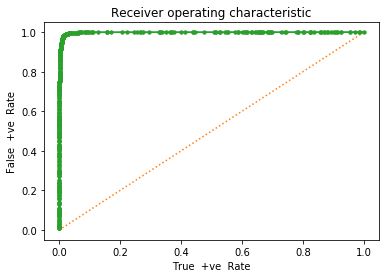

In [115]:
#Plot the Receiver operating characteristic (ROC) curve
from matplotlib import pyplot
#Calculate roc curve
false_positiverate, true_positiverate, thresholds = roc_curve(y_test, y_predict_pb)
plt.plot(false_positiverate,true_positiverate)
#plot no skill
pyplot.plot([1, 0], [1, 0], linestyle=':')
# plot the roc curve for the model
pyplot.plot(false_positiverate,true_positiverate,marker='.')
pyplot.ylabel('False  +ve  Rate')
pyplot.xlabel('True  +ve  Rate')
pyplot.title('Receiver operating characteristic')
pyplot.show()